##  Plotting geological and tectonic content of Fennoscandia 

Feel free to modify or play around with the different parameters!

Packages required on your system:
* PyGMT (and corresponding libraries, e.g. pandas, numpy, xarray), still under development (see <https://www.pygmt.org/dev/overview.html>)

The tectonic/geological content shown in the following was partly digitised using Didger® (Golden Software, LLC) based on the references given at the bottom of this notebook.

author: M. Grund (2020-02-23), content digitization: F. Lutz

In [1]:
import pygmt
import numpy as np
import pandas as pd

Create a new pygmt figure object.

In [2]:
fig = pygmt.Figure()

Just to see how the stack works, first we plot the contours of Fennoscandia. Note, this is not necessarily required.

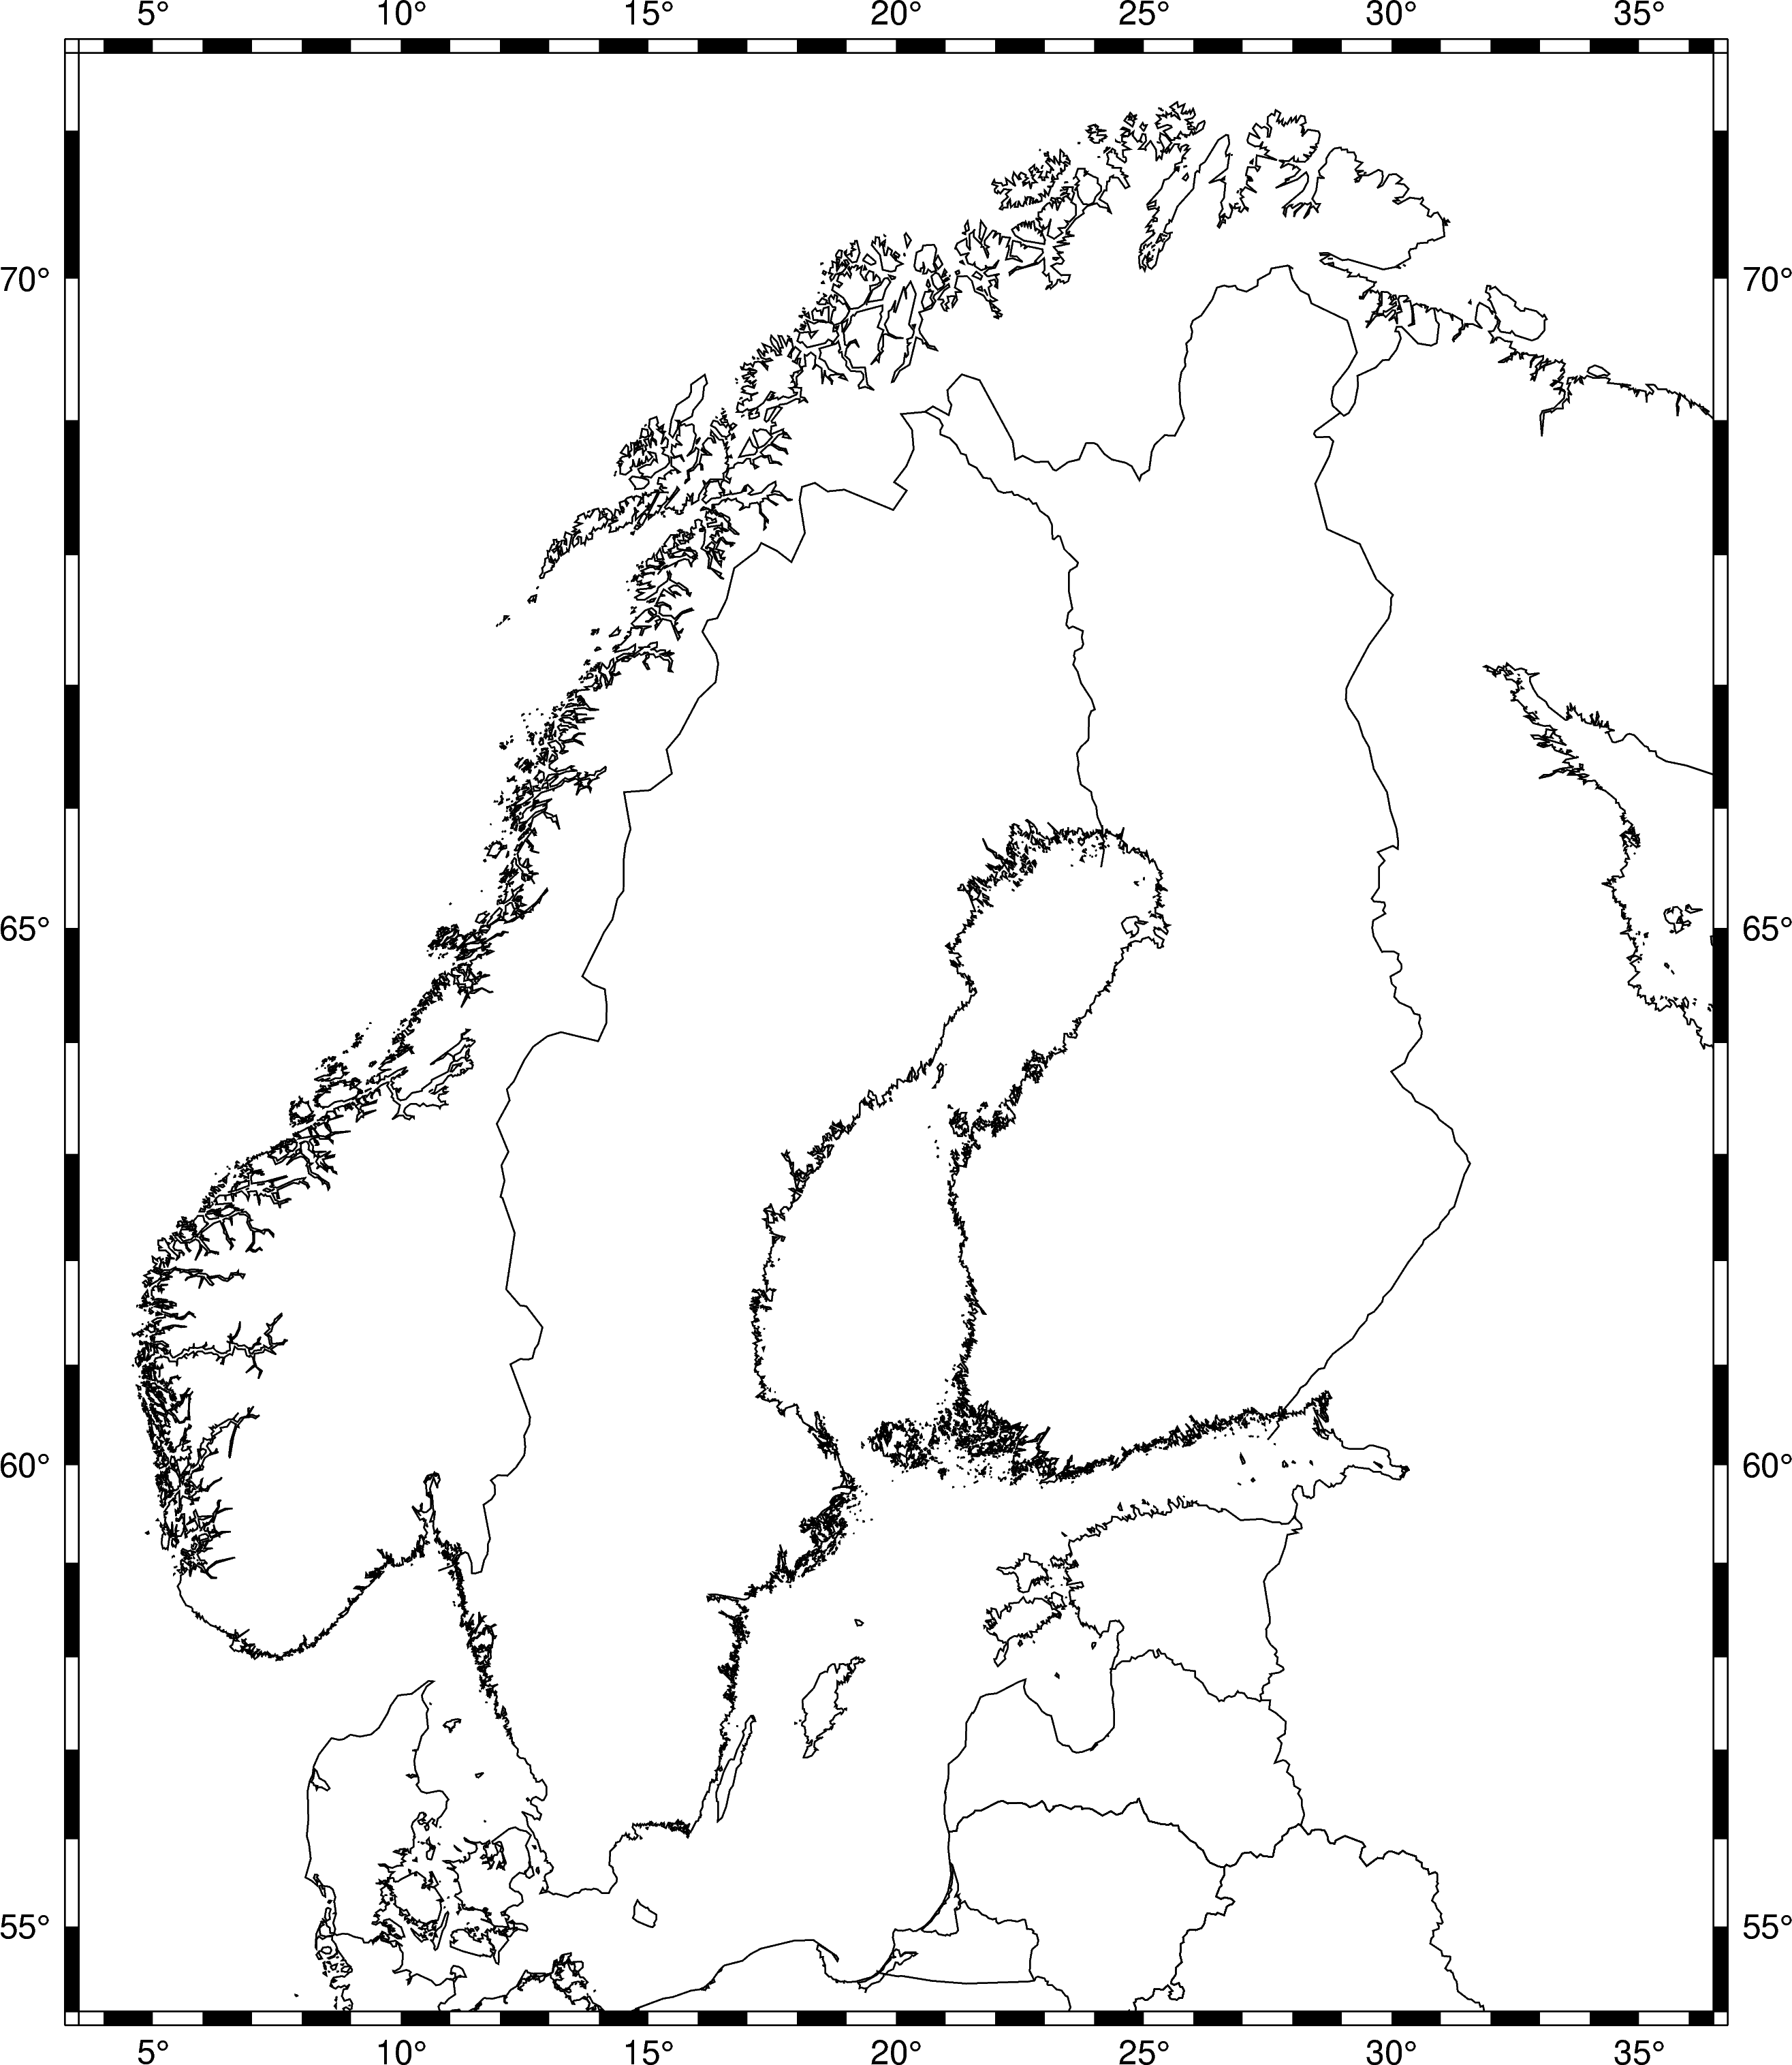

In [3]:
# define region
regvals = [3.5, 36.5, 54, 71.5]

# plot coastlines etc.
fig.coast(region = regvals, projection = 'M8i', \
          resolution = 'i', shorelines ='1/0.5p,black', 
          frame = True, borders = ['1/0.5p,black'])

fig.show()

* load the file (`filein = 'scan_tectonic.dat'`) containing the digitzed tectonic units using pandas
* define colors for the individual units
* merge content into a dictionary for easier access later

In [4]:
# read file using pandas
filein = 'scan_tectonic.dat'
namescol = ['lon', 'lat', 'name', 'num']
datatab = pd.read_table(filein, sep="\s+", skiprows = 5, names = namescol)

# colors of different tectonic units
col_sveco = '248/188/203'
col_rapa = 'darkgray'
col_paleo = '107/107/148'
col_phanero = '115/195/128'
col_sveconor = '238/106/80'
col_arch = '241/99/106'
col_cale = '249/190/75'
col_TIB = '149/116/83'

# generate dict to store all data
provs = {'Phanerozoic2': col_phanero, 'Svecofennian': col_sveco, 'Rapaviki': col_rapa,
         'Paleoproterozoic': col_paleo, 'Phanerozoic': col_phanero, 'Sveconorwegian': col_sveconor,
         'Archean': col_arch, 'Caledonides': col_cale, 'TIB': col_TIB}

Plot the individual tectonic units with their corresponding colors and define labels for the legend (`label = key`) that is created later. Prior do some filtering based on the names and values given in the input file. 

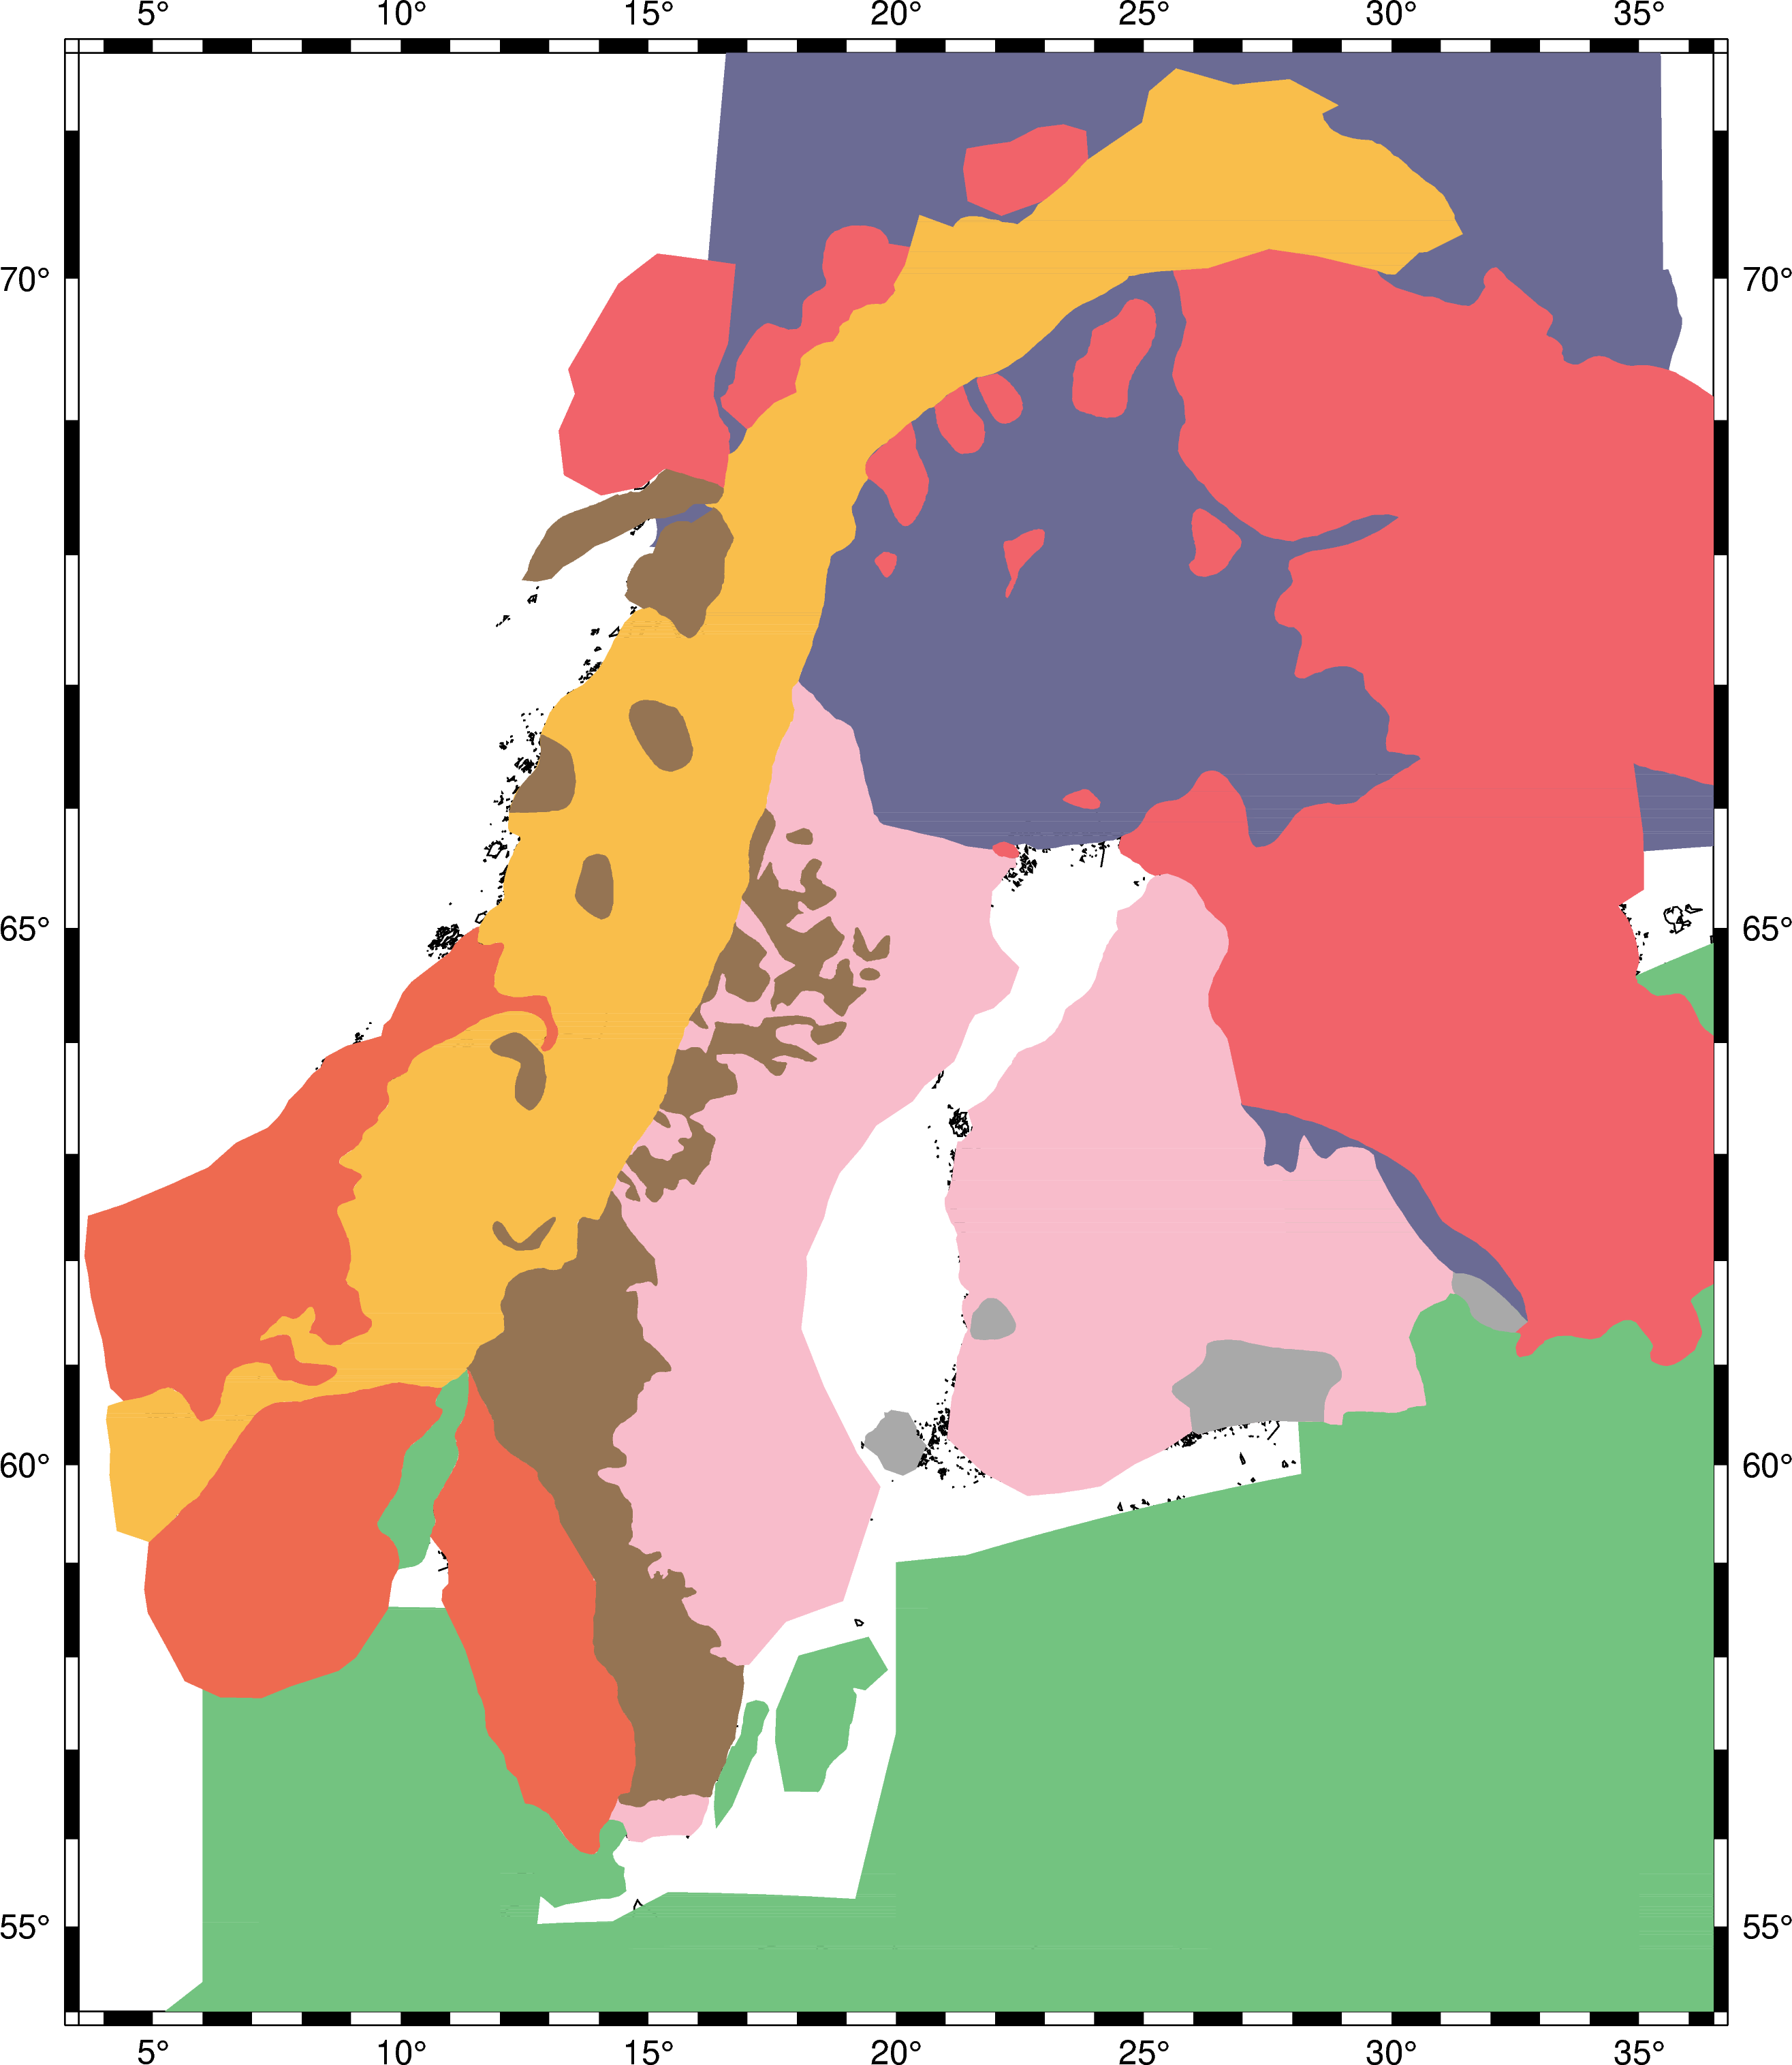

In [5]:
for key in provs:
    tabfilt11 = datatab[(datatab['name'] == key)].copy() # for each data point get name of corresponding tectonic unit
    vals = np.unique(tabfilt11['num']) # remove doublets
    
    for val in vals: # go through the different unit names and plot the areas in the defined colors
        tabfilt12 = tabfilt11[(tabfilt11['num'] == val)].copy()

        tabfilt12['lon'] = tabfilt12['lon'].astype(float) # convert to float

        lons = tabfilt12['lon']
        lats = tabfilt12['lat']
        
        # consider each area only once in the legend below (label is set or not)
        if val == 1:
            fig.plot(x = lons, y = lats, color = provs[key], label = key)
        else:
            fig.plot(x = lons, y = lats, color = provs[key])

fig.show()

Add coastlines etc. on top to display only land masses in color of tectonic units and plot water areas in white (`water = 'white'`). Wet areas (e.g. lakes) are shown in steelblue color (`C = 'steelblue'`), political borders as black dashed lines (`borders = ["1/0.5p,black,--"]`). Finally, add a scalebar in upper left corner (`map_scale = 'f8.3/70.3/56/400+lkm+jt'`).

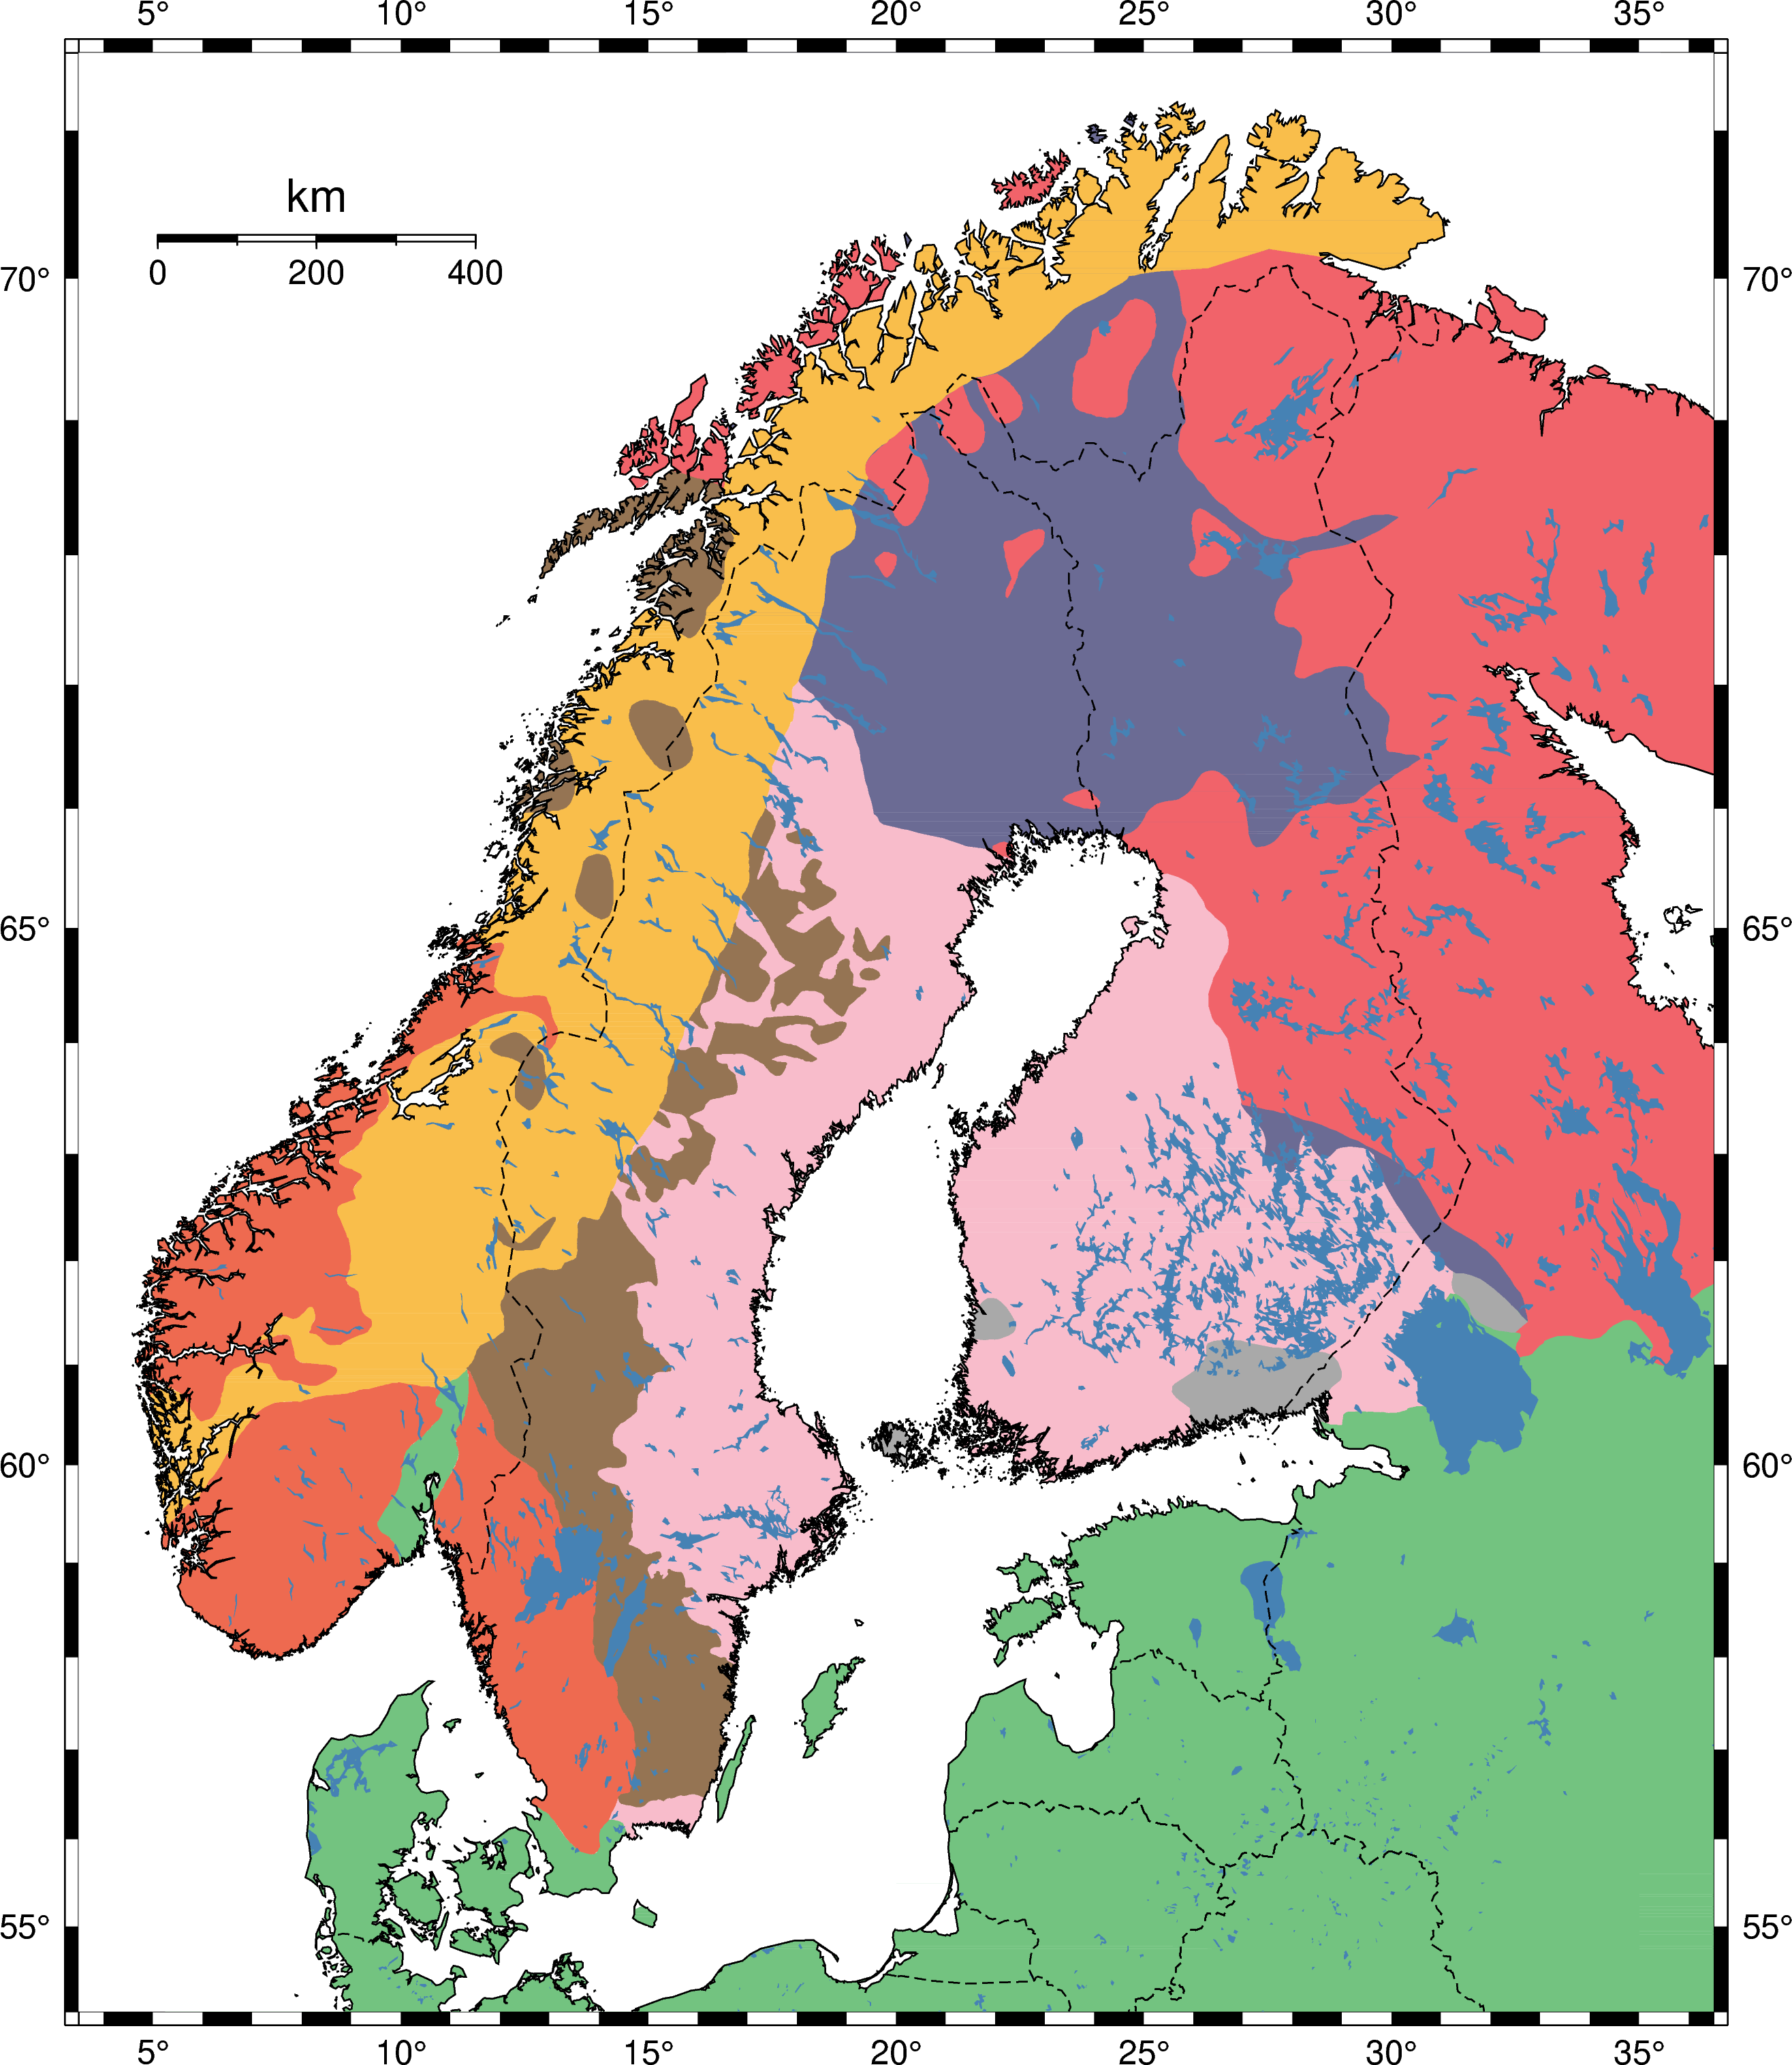

In [6]:
# add coast again on top, add national borders as dashed lines, plot lakes in steelblue color, oceans are plotted in white 
# atop which generates the masked view
fig.coast(resolution = 'i', shorelines ='1/0.5p,black', \
          C = 'steelblue', borders = ['1/0.5p,black,--'], water = 'white', map_scale = 'f8.3/70.3/56/400+lkm+jt')

fig.show()

Now we add further tectonic features like shear zones and inferred paleo-subduction zones. 

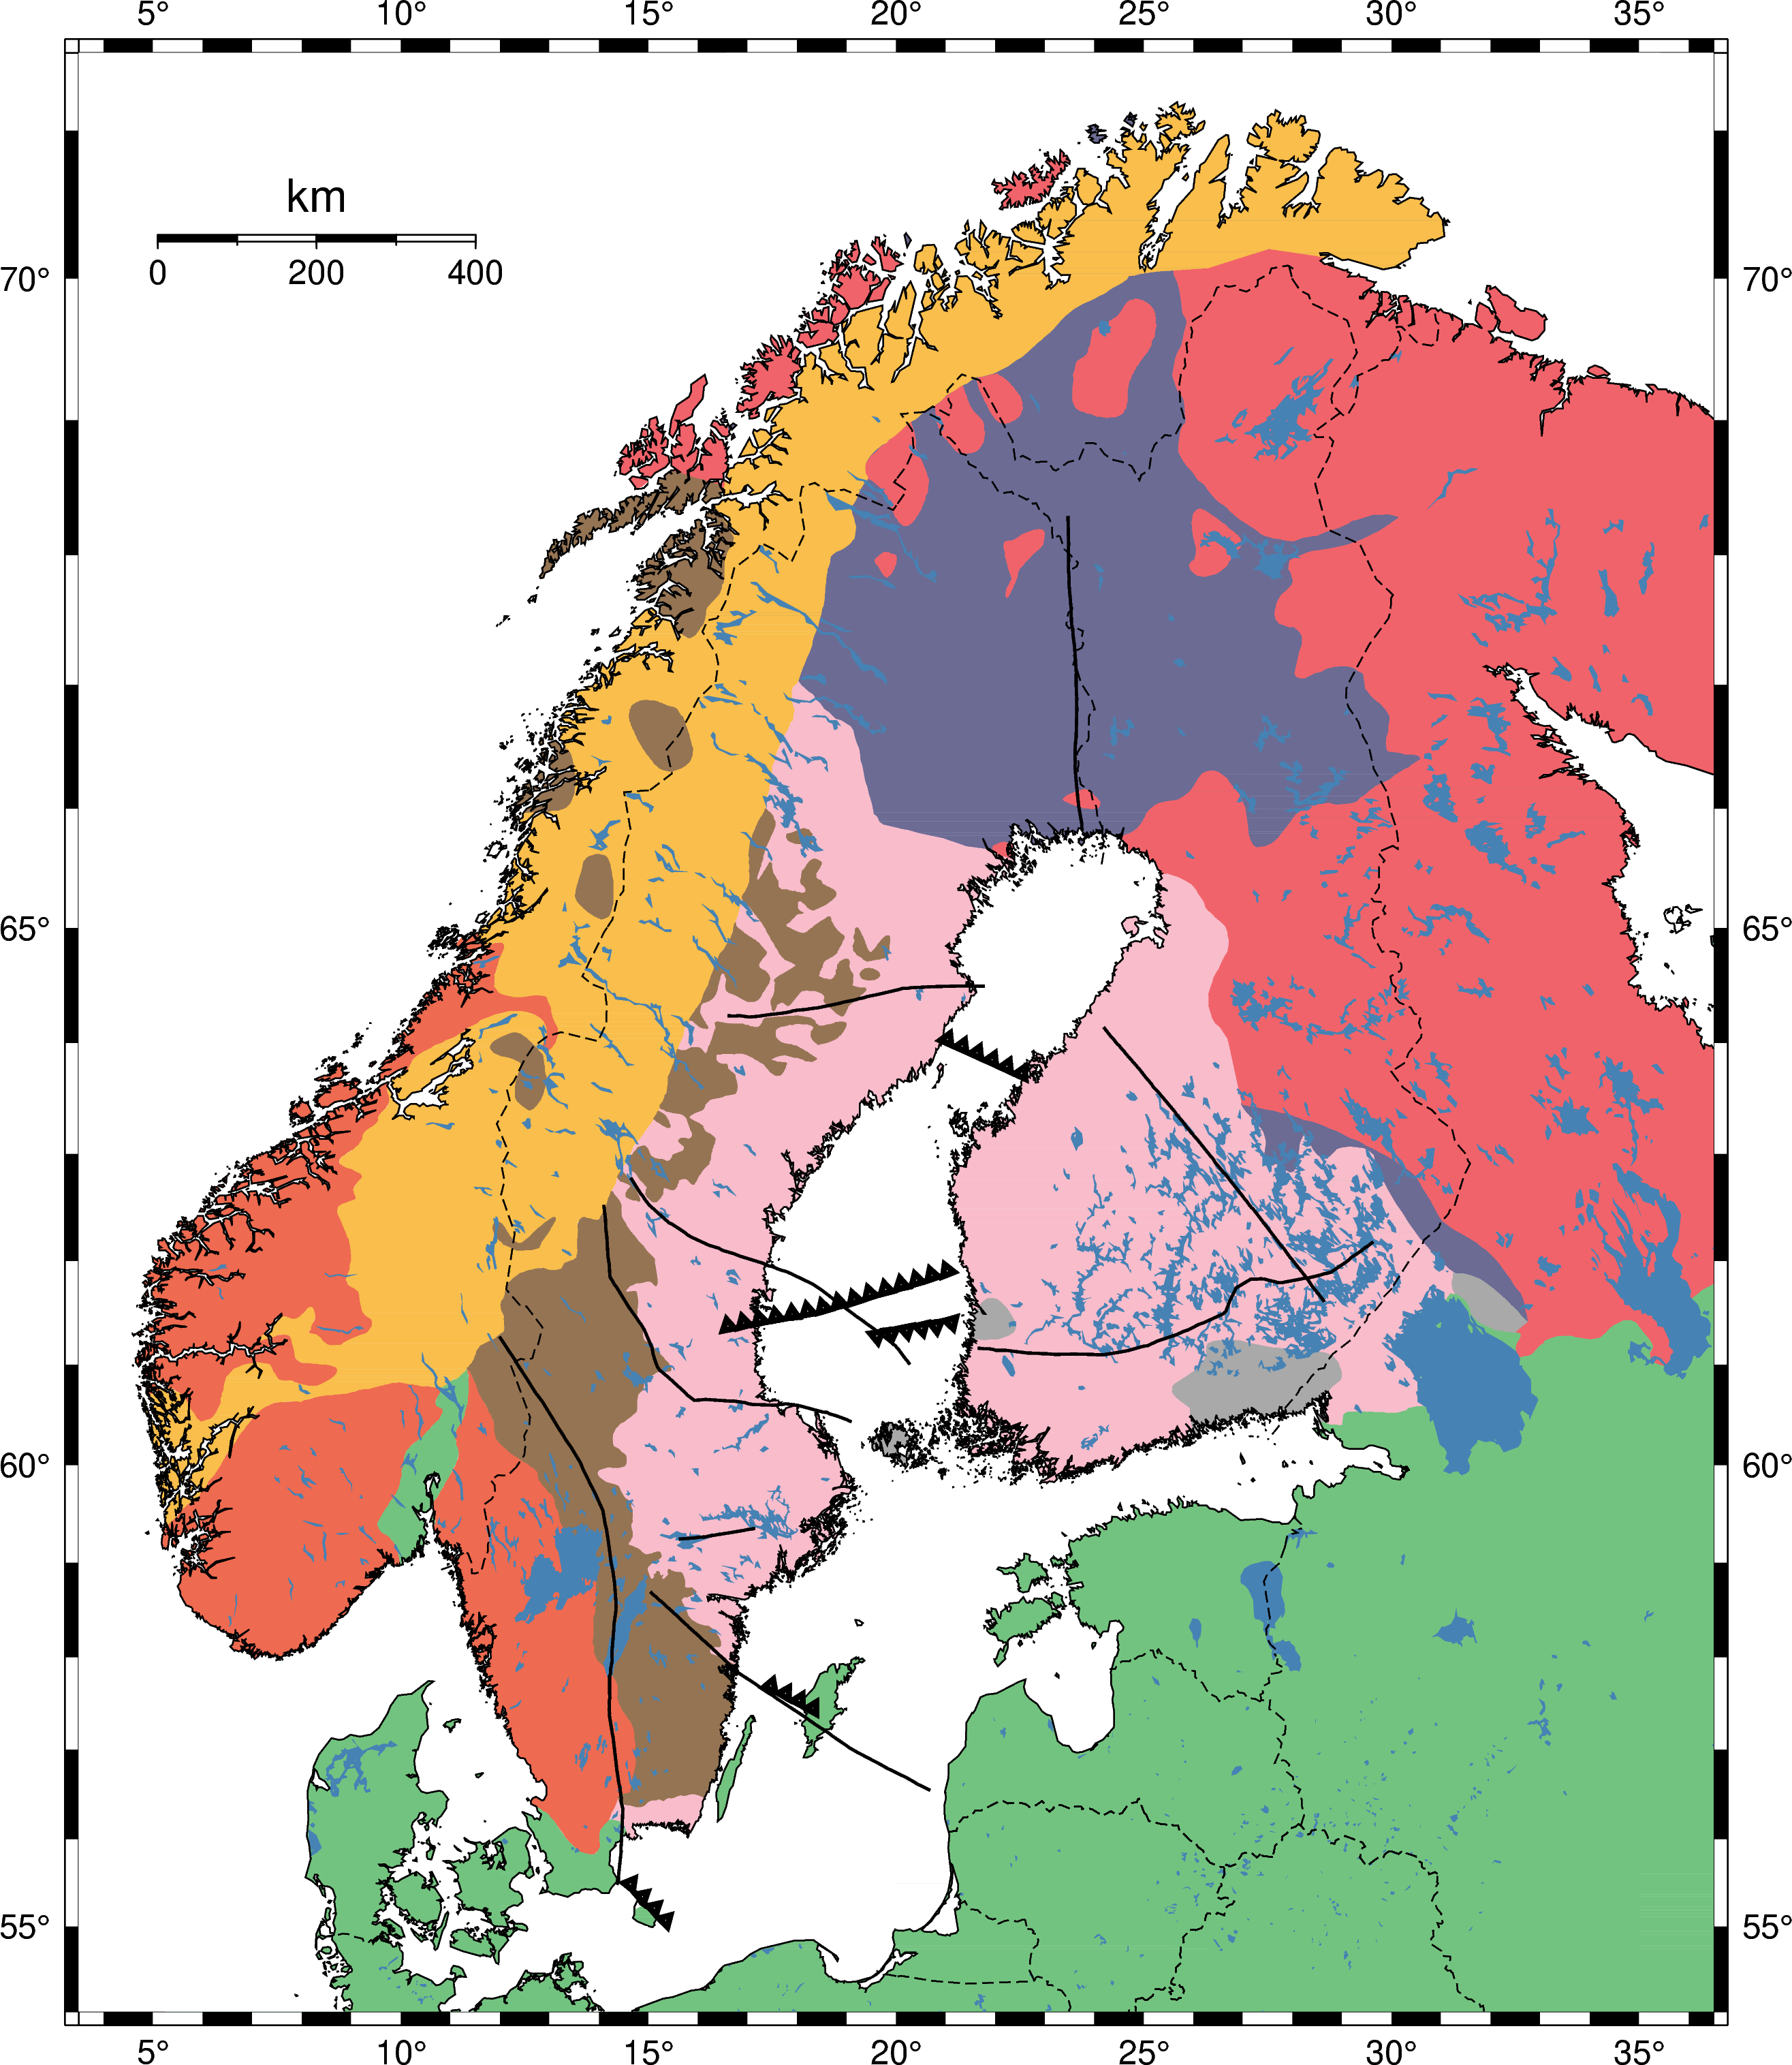

In [7]:
# read in file using pandas
filein2 = 'scan_shear_zones.dat'
namescol2 = ['lon', 'lat', 'name']
datatab2 = pd.read_table(filein2, sep="\s+", skiprows = 5, names = namescol2)

# get single names of individual structures to plot
names = list(set(datatab2['name']))
namescl = [x for x in names if str(x) != 'nan']

for name in namescl: # go through the different names 
    tabfilt21 = datatab2[(datatab2['name'] == name)].copy()
    
    tabfilt21['lon'] = tabfilt21['lon'].astype(float) # convert to float
    lons = tabfilt21['lon']
    lats = tabfilt21['lat']
    
    # first distinguish between shear zones and subduction zones
    if name.startswith('Shear'):
        fig.plot(x = lons, y = lats, pen = '1p,black')
    else:
        
        # now distinguish in which direction ((l)eft or (r)ight) sawtooth pattern should be plotted
        if name.endswith('r'):    
            fig.plot(x = lons, y = lats, style = 'f0.2/0.15+t+r', pen = '2p,black')
        else:
            fig.plot(x = lons, y = lats, style = 'f0.2/0.15+t+l', pen = '2p,black')
    
fig.show()

In the following we add the digitized Tornquist zone and add a legend in the lower right corner.

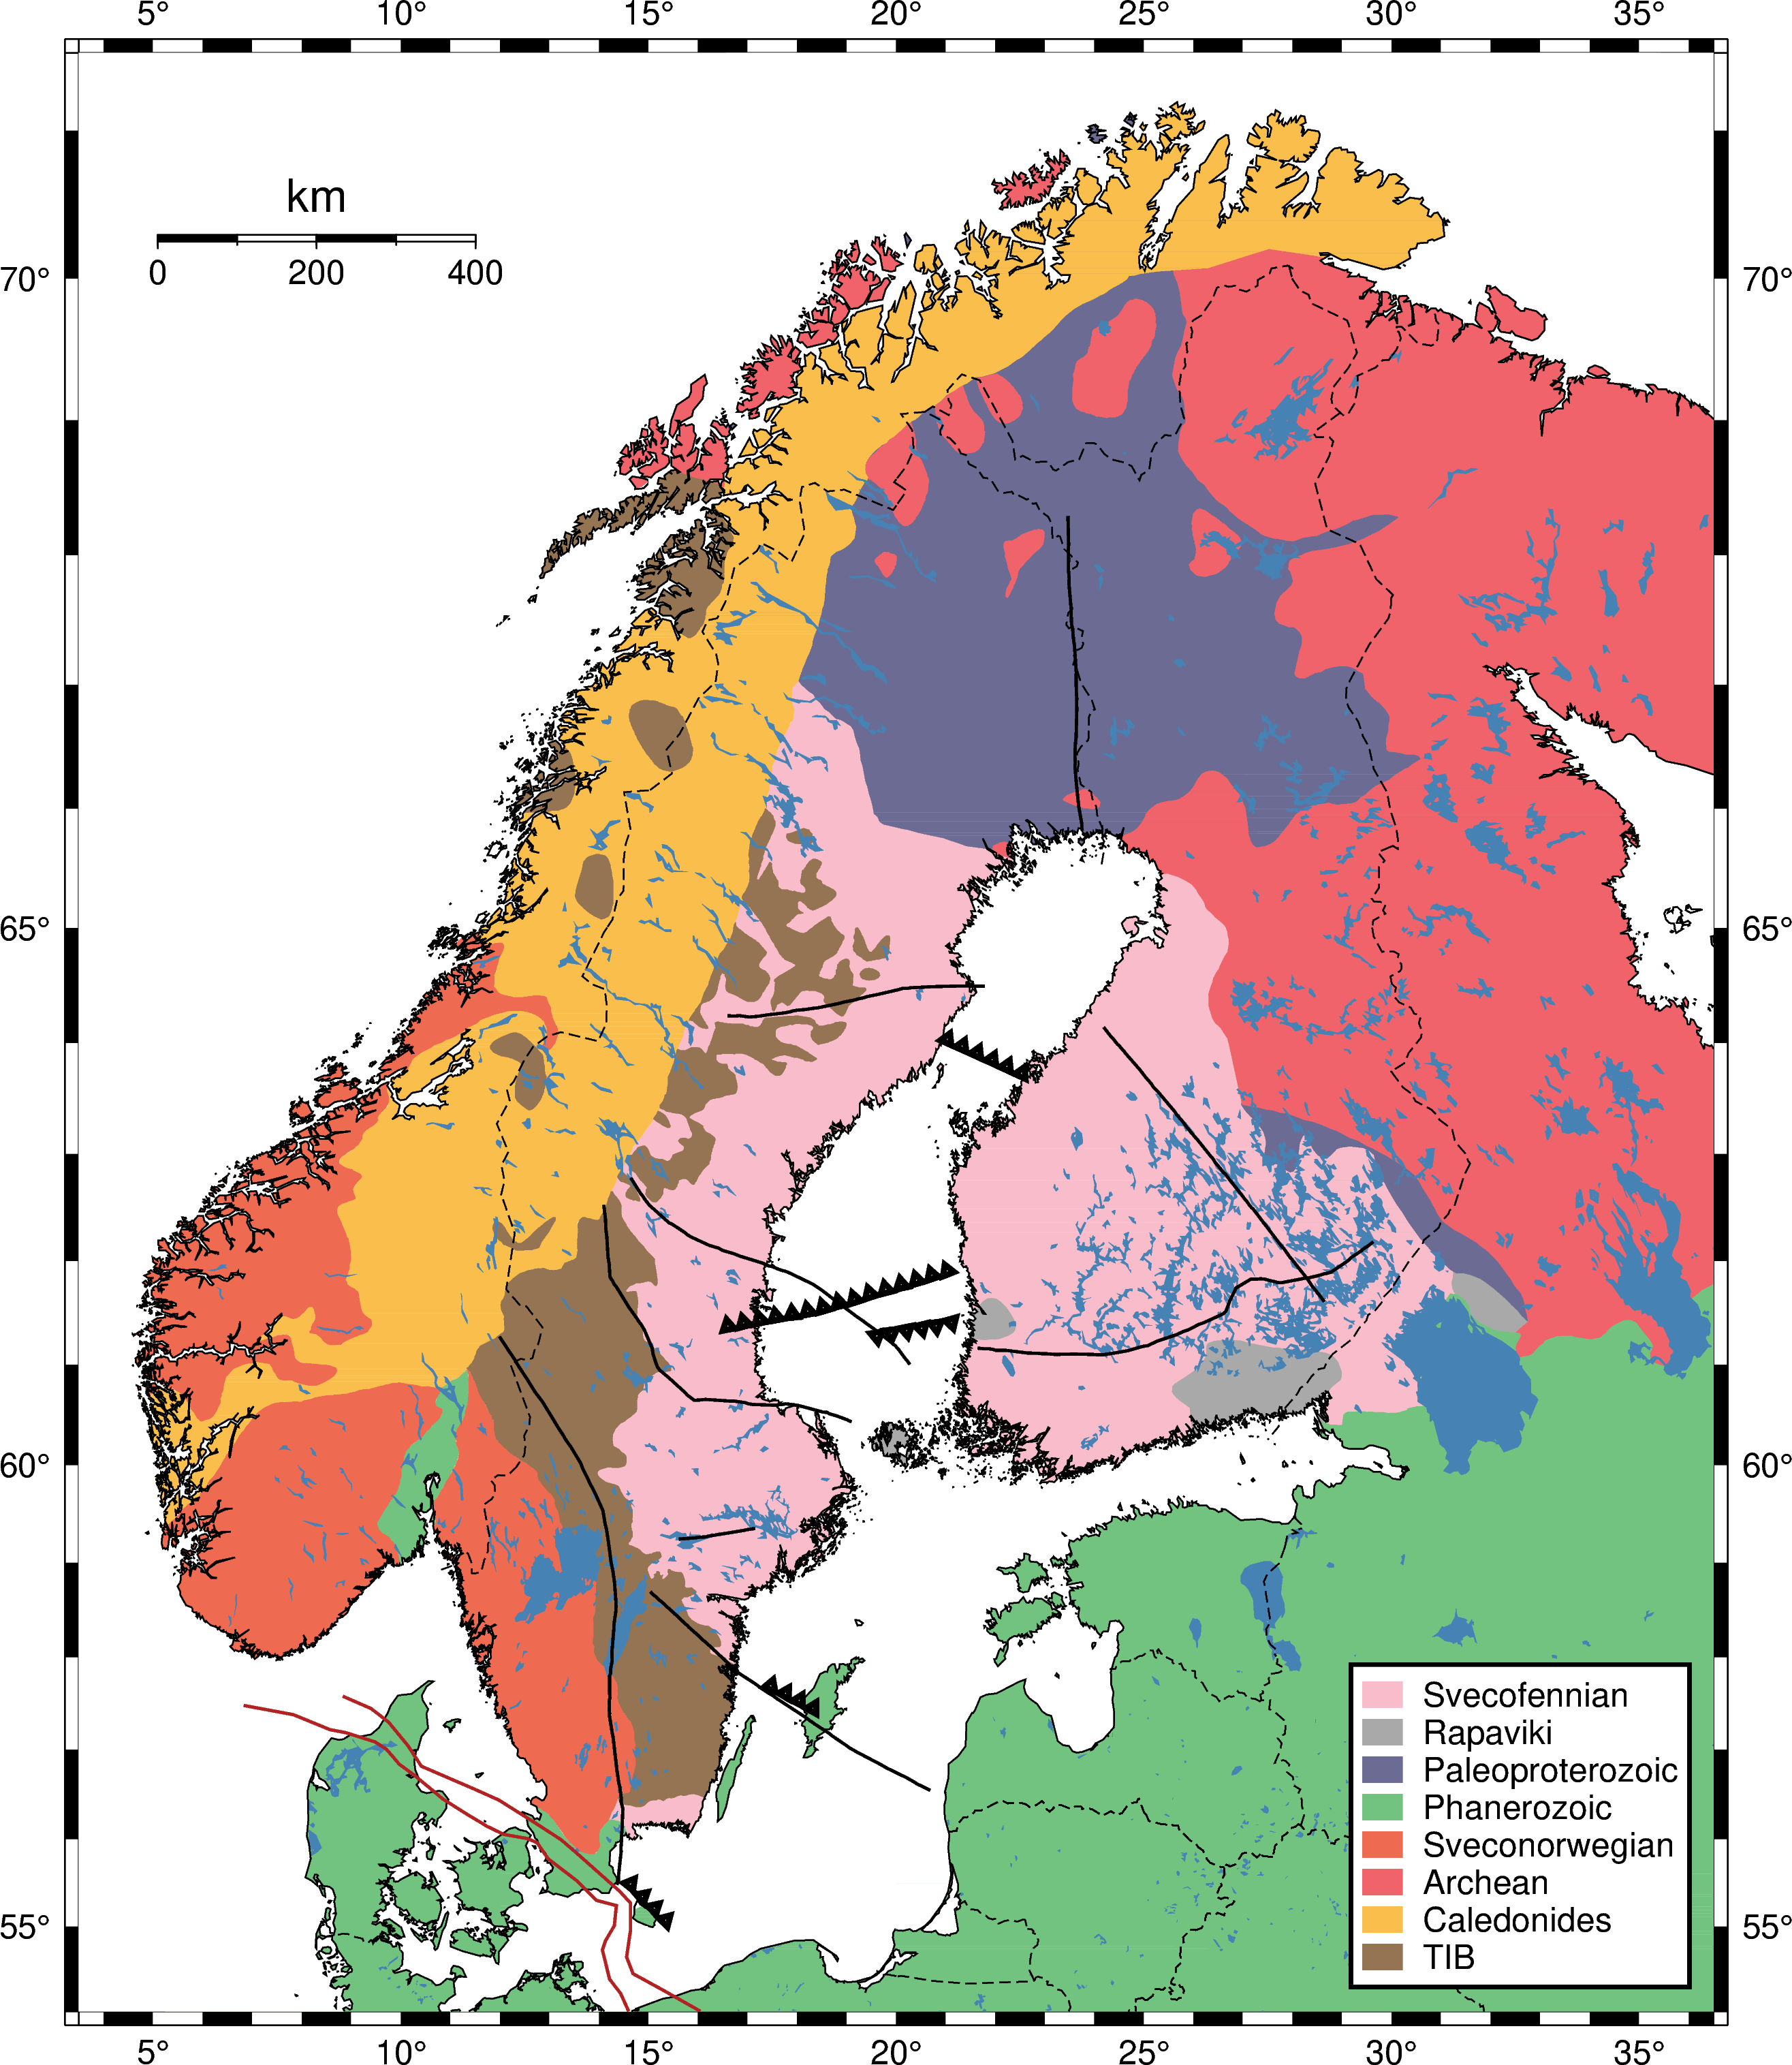

In [8]:
# read in file using pandas, we can use the columnnames from above here 
filein3 = 'scan_STZ.dat'
datatab3 = pd.read_table(filein3, sep="\s+", skiprows = 3, names = namescol2)

# get single names of individual structures to plot
names2 = list(set(datatab3['name']))
namescl2 = [x for x in names2 if str(x) != 'nan']  
   
# plot the Tornquist zone in firebrick red color    
for name in namescl2:   
    tabfilt31 = datatab3[(datatab3['name'] == name)].copy()
    
    tabfilt31['lon'] = tabfilt31['lon'].astype(float) # convert to float
    lons = tabfilt31['lon']
    lats = tabfilt31['lat']
    
    fig.plot(x = lons, y = lats, pen = '1p,firebrick')

# generate legend    
fig.legend(position = 'JBR+jBR+o0.3c', box='+gwhite+p1.5p,black')

fig.show()

Finally, add annotations to map (country names in white, the two parts of the Tornquist Zone, STZ and TTZ, in firebrick red).

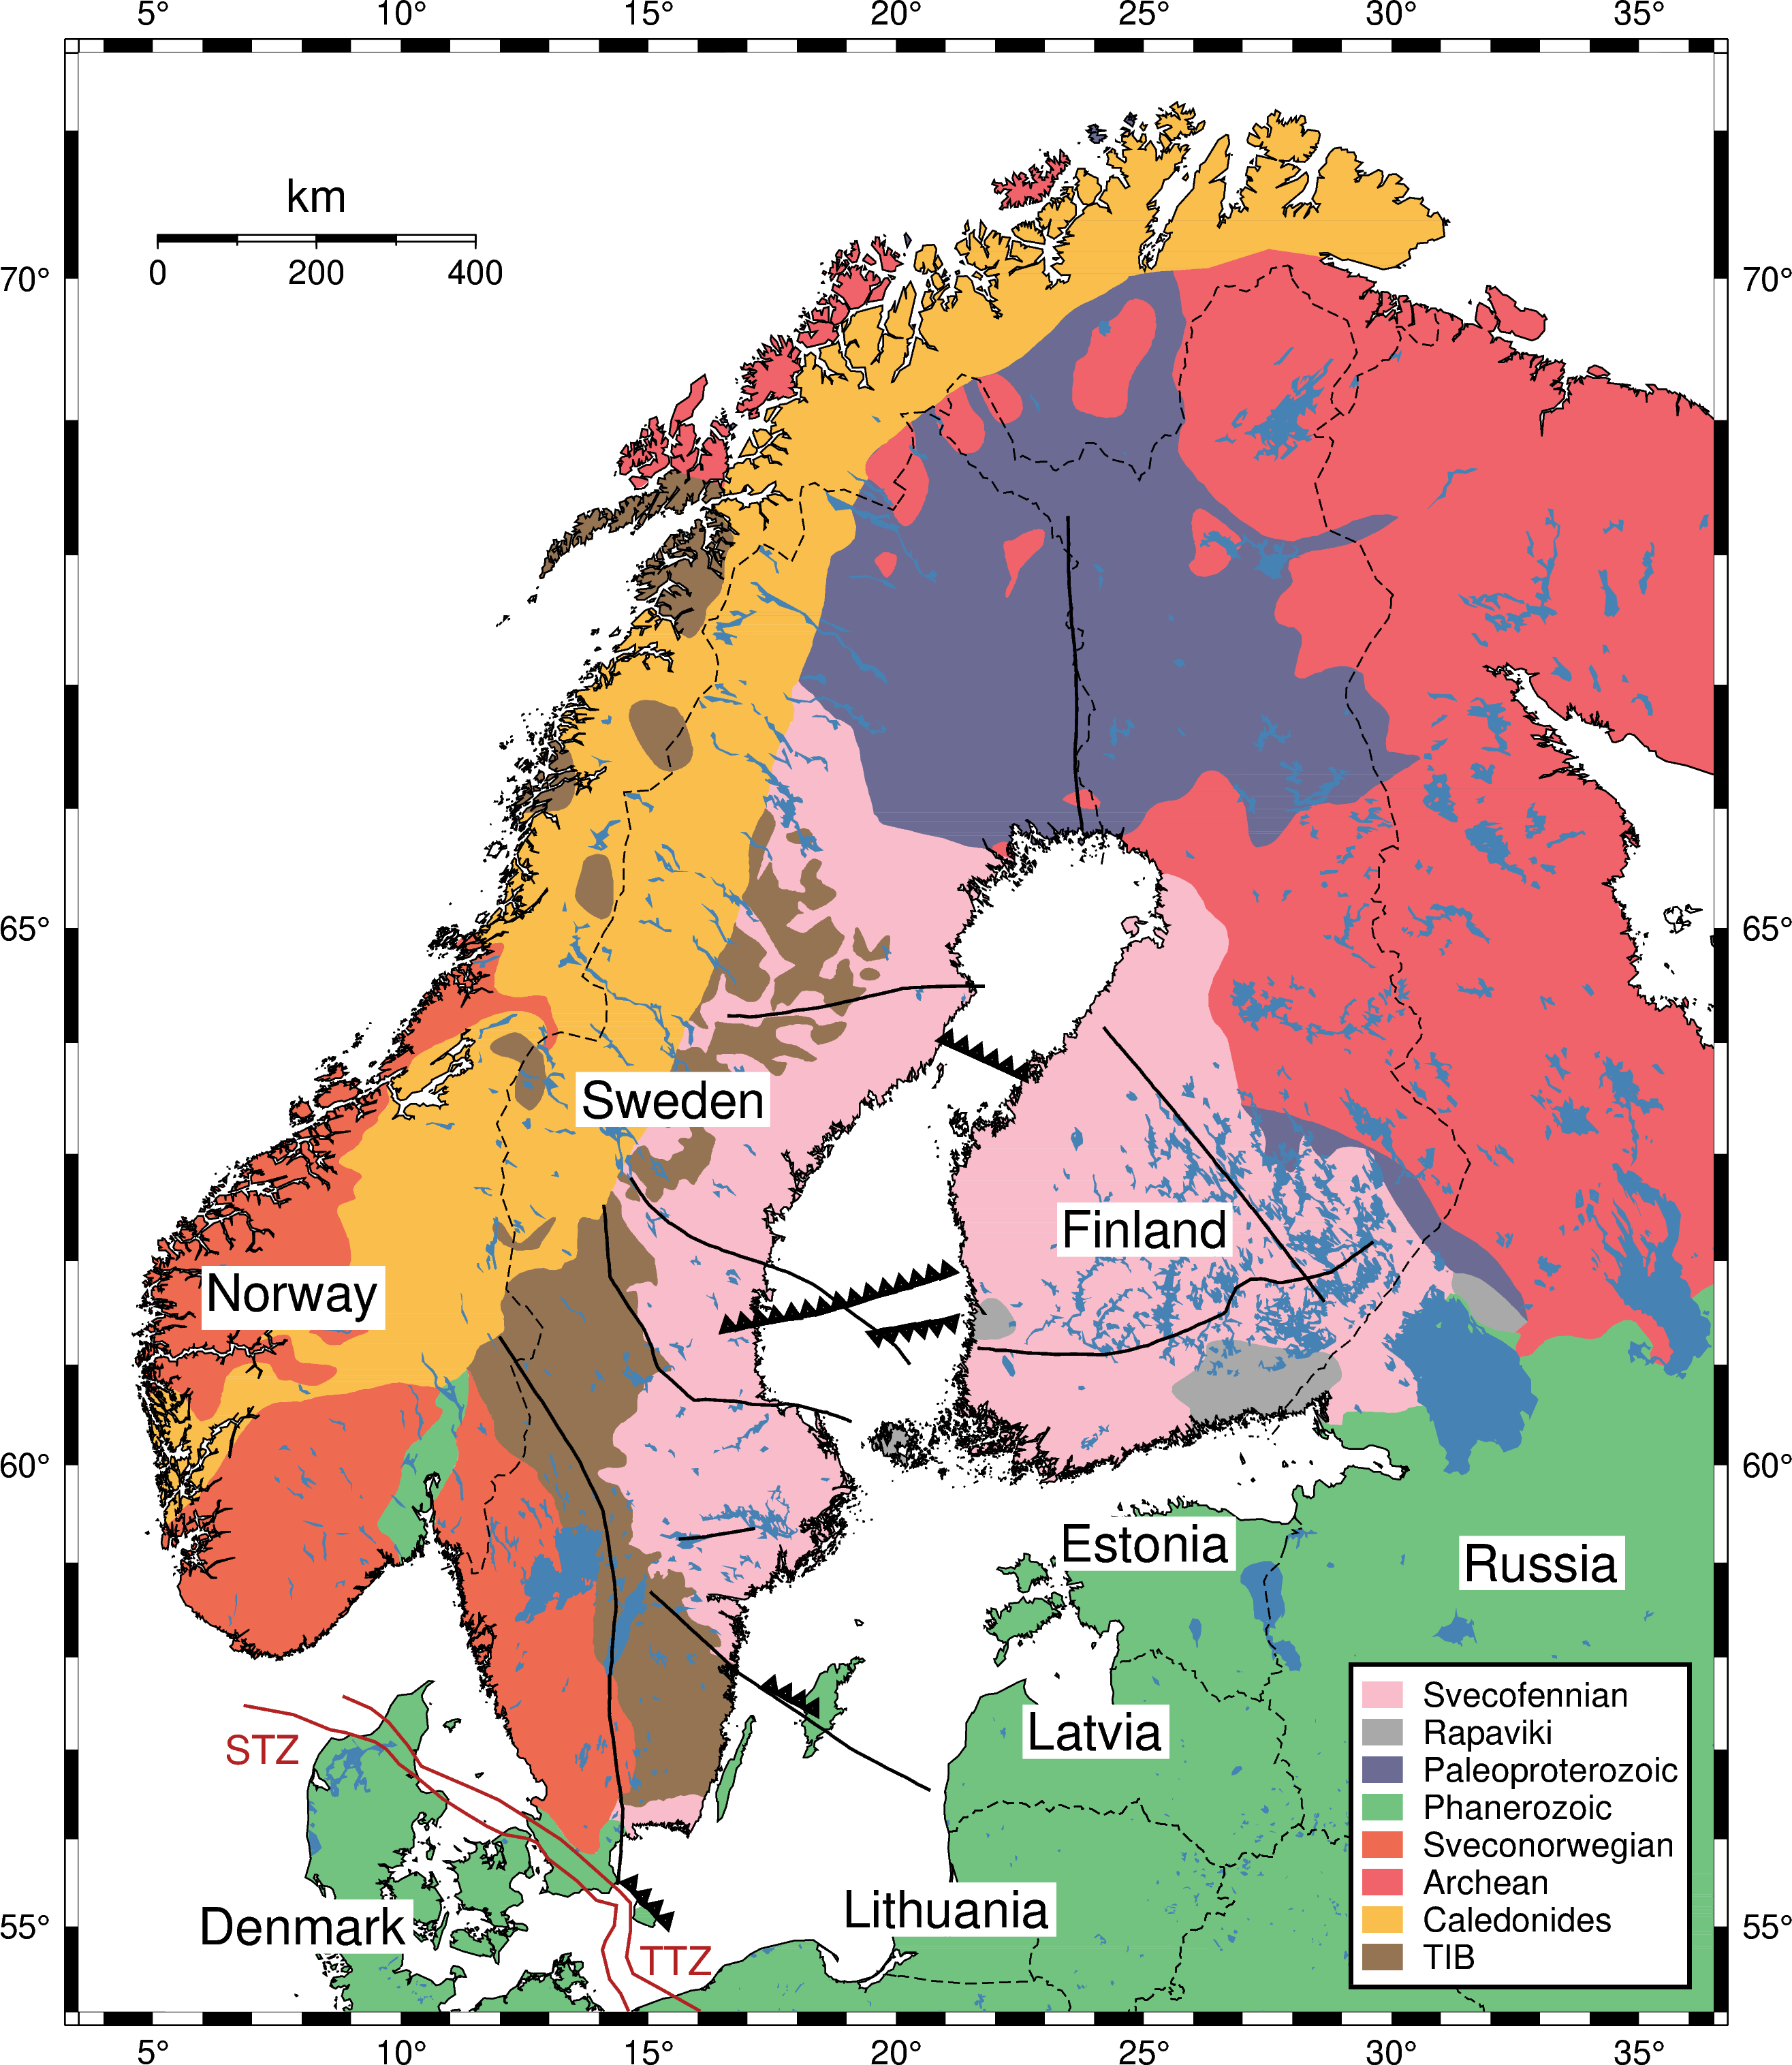

In [9]:
# countries
textsize = '18p'
textcol = 'black'
textbcol = 'white'

fig.text(x = 25, y = 62.3, text = 'Finland', font = textsize + ',' + textcol, G = textbcol)
fig.text(x = 15.5, y = 63.5, text = 'Sweden', font = textsize + ',' + textcol, G = textbcol)
fig.text(x = 7.8, y = 61.7, text = 'Norway', font = textsize + ',' + textcol, G = textbcol)
fig.text(x = 8, y = 55 , text = 'Denmark', font = textsize + ',' + textcol, G = textbcol)
fig.text(x = 33, y = 59 , text = 'Russia', font = textsize + ',' + textcol, G = textbcol)
fig.text(x = 25, y = 59.2 , text = 'Estonia', font = textsize + ',' + textcol, G = textbcol)
fig.text(x = 24, y = 57.2 , text = 'Latvia', font = textsize + ',' + textcol, G = textbcol)
fig.text(x = 21, y = 55.2 , text = 'Lithuania', font = textsize + ',' + textcol, G = textbcol)

# STZ/TTZ
textsize = '14p'
textcol = 'firebrick'

fig.text(x = 7.2, y = 57 , text = 'STZ', font = textsize + ',' + textcol)
fig.text(x = 15.55, y = 54.6 , text = 'TTZ', font = textsize + ',' + textcol)

fig.show()

Save the figure in png format with a resolution of 400 dpi.

In [10]:
fig.savefig('PLOT_map_Fenno.png', dpi = 400)

### References
* **Högdahl et al. (2004)**, Geological Survey of Finland, Special Paper 37, The Transscandinavian Igneous Belt (TIB) in Sweden: a review of its character and evolution
* **Wylegalla et al. (1999)**, Tectonophysics 314, Anisotropy across the Sorgenfrei-Tornquist Zone from shear wave splitting, https://doi.org/10.1016/S0040-1951(99)00252-8
* **Korja & Heikkinen (2005)**, Precambrian Research 136, 241-268 The accretionary Svecofennian orogen-insight from the BABEL profiles, https://doi.org/10.1016/j.precamres.2004.10.007

